# CMSE 821 Fall 2025
## By Christlieb 11/13/2025 with aid form ChatGPT
## Used ChatGPT for comments and debuging
## Example 1D linear system:
1D Advection Equation (Periodic) — Beam–Warming + Boundary Condtions - error in space and time ( 𝑂(Δ𝑥2)+𝑂(Δ𝑡2) )
---



---
# Boundary Conditions for Beam–Warming Applied to the 1D Advection Equation

We consider the linear advection equation
$$
u_t + a\,u_x = 0,
$$
on a domain $x \in [0,L]$, discretized on a uniform grid
$$
x_j = j\Delta x,\qquad j = 0,1,\dots,N.
$$
Let $u_j^n$ denote the numerical approximation to $u(x_j,t^n)$, with $t^n=n\Delta t$.
We assume **$a>0$**, so the flow moves from **left to right**, and the **inflow boundary** is at $x=0$.

---

# The Beam–Warming Scheme

For $a>0$, the Beam–Warming method is a **second-order upwind scheme** given by
$$
u_j^{n+1}
=
u_j^n
- \frac{a\Delta t}{2\Delta x}\left(3u_j^n - 4u_{j-1}^n + u_{j-2}^n\right)
+ \frac{a^2\Delta t^2}{2\Delta x^2}\left(u_j^n - 2u_{j-1}^n + u_{j-2}^n\right).
$$

This stencil requires the values
$$
u_j^n,\qquad u_{j-1}^n,\qquad u_{j-2}^n.
$$

For the first two grid points ($j=0$ and $j=1$), the values $u_{-1}^n$ and $u_{-2}^n$ lie **outside** the computational domain.  
We therefore need to devlope the idea of **ghost cells**.  **ghost cells** are points we introduce such that we will have the needed data at $j=-2$ and $j=-1$.  The unknown data we need to approximate is:
- $u_{-1}^n$ (one point outside left boundary),
- $u_{-2}^n$ (two points outside left boundary).

The specific values at the ghost cells $j=-2$ and $j=-1$ depend on the **boundary condition**.

---

# 1. Periodic Boundary Conditions

Periodic BCs (wrap-around):
$$
u(0,t) = u(L,t),\qquad
u_x(0,t)=u_x(L,t).
$$

Thus the grid values satisfy
$$
u_0^n = u_N^n,\qquad u_{j+N}^n = u_j^n.
$$

Ghost cells are obtained by **wrapping around** the array:
$$
u_{-1}^n = u_{N-1}^n,\qquad
u_{-2}^n = u_{N-2}^n.
$$

Beam–Warming can then be applied uniformly across the domain.

---

# 2. Dirichlet Boundary Conditions

Suppose the **inflow value** is specified:
$$
u(0,t) = g(t).
$$

This imposes the grid value
$$
u_0^n = g(t^n).
$$

To supply the stencil with ghost values, we use **extrapolation**.

---

## Linear Extrapolation (First-Order Accurate)

Linear extrapolation assumes that the solution near the boundary is **approximately a straight line**.  
We use this idea to define ghost cell values for a Dirichlet boundary.

Suppose the computational domain begins at  
$$
x_0 = 0,
$$
and we know the values
$$
u_0^n = u(x_0,t^n) = g(t^n),
\qquad
u_1^n = u(x_1,t^n), \quad x_1 = \Delta x.
$$

We want values at the ghost points  
$$
x_{-1} = -\Delta x, \qquad x_{-2} = -2\Delta x.
$$

---

### Step 1: Compute the local slope

Assuming the solution is linear between $x_0$ and $x_1$, the slope is
$$
m = \frac{u_1^n - u_0^n}{\Delta x}.
$$

A linear model through the two interior points is
$$
u(x) \approx u_0^n + m(x - x_0)
           = u_0^n + m x,
$$
since $x_0=0$.

---

### Step 2: Extrapolate to the first ghost cell

At $x_{-1} = -\Delta x$,
$$
u_{-1}^n = u_0^n + m(-\Delta x)
         = u_0^n - m\Delta x.
$$

But
$$
m\Delta x = u_1^n - u_0^n,
$$
so
$$
u_{-1}^n
= u_0^n - (u_1^n - u_0^n)
= 2u_0^n - u_1^n.
$$

Using the Dirichlet boundary value $u_0^n = g(t^n)$,
$$
u_{-1}^n = 2g(t^n) - u_1^n.
$$

---

### Step 3: Extrapolate to the second ghost cell

The same straight-line model applies between  
$$
(x_{-1}, u_{-1}^n),\quad (x_0, u_0^n).
$$

So one more step to the left gives
$$
u_{-2}^n = u_{-1}^n + (u_{-1}^n - u_0^n)
         = 2u_{-1}^n - u_0^n.
$$

Substitute the expression for $u_{-1}^n$:
$$
u_{-2}^n
= 2(2u_0^n - u_1^n) - u_0^n
= 3u_0^n - 2u_1^n.
$$

With $u_0^n = g(t^n)$,
$$
u_{-2}^n = 3g(t^n) - 2u_1^n.
$$

---

## Final First-Order Ghost Cell Formulas

$$
u_{-1}^n = 2g(t^n) - u_1^n,
\qquad
u_{-2}^n = 3g(t^n) - 2u_1^n.
$$

These formulas are **first-order accurate** because linear extrapolation only preserves the first derivative of the solution near the boundary.


## Second-Order Extrapolation (Quadratic)

Linear extrapolation assumes the solution is a straight line near the boundary.  
To achieve **second-order accuracy**, we instead assume that the true solution is well-approximated near $x=0$ by a **quadratic polynomial**:

$$
p(x) = A + Bx + Cx^2.
$$

We will determine the coefficients $A,B,C$ from **three interior points**, and then evaluate $p(x)$ at the ghost cell locations $x=-\Delta x$ and $x=-2\Delta x$.

---

## 1. Interior data points

We know the solution at three interior grid points:

- $x_0 = 0$, $u_0^n = u(x_0,t^n)$
- $x_1 = \Delta x$, $u_1^n = u(x_1,t^n)$
- $x_2 = 2\Delta x$, $u_2^n = u(x_2,t^n)$

The quadratic polynomial must satisfy:

$$
p(x_0) = p(0) = A = u_0^n,
$$

$$
p(x_1) = p(\Delta x) = A + B\Delta x + C(\Delta x)^2 = u_1^n,
$$

$$
p(x_2) = p(2\Delta x) = A + 2B\Delta x + 4C(\Delta x)^2 = u_2^n.
$$

These three equations determine $A,B,C$.

---

## 2. Solve for $B$ and $C$

Since $A = u_0^n$, substitute into the remaining equations:

### At $x=\Delta x$:
$$
u_1^n = u_0^n + B\Delta x + C\Delta x^2.
$$

Subtract $u_0^n$:
$$
u_1^n - u_0^n = B\Delta x + C\Delta x^2.
\tag{1}
$$

### At $x=2\Delta x$:
$$
u_2^n = u_0^n + 2B\Delta x + 4C\Delta x^2.
$$

Subtract $u_0^n$:
$$
u_2^n - u_0^n = 2B\Delta x + 4C\Delta x^2.
\tag{2}
$$

Now eliminate $B$.

Multiply equation (1) by 2:

$$
2(u_1^n - u_0^n) = 2B\Delta x + 2C\Delta x^2.
\tag{1a}
$$

Subtract (1a) from (2):

$$
(u_2^n - u_0^n) - 2(u_1^n - u_0^n)
= (2B\Delta x + 4C\Delta x^2) - (2B\Delta x + 2C\Delta x^2).
$$

Simplify:

Left-hand side:
$$
u_2^n - u_0^n - 2u_1^n + 2u_0^n
= u_2^n - 2u_1^n + u_0^n.
$$

Right-hand side:
$$
2C\Delta x^2.
$$

Thus:

$$
2C\Delta x^2 = u_2^n - 2u_1^n + u_0^n,
$$

$$
C = \frac{u_2^n - 2u_1^n + u_0^n}{2\Delta x^2}.
$$

Then substitute back into (1) to solve for $B$:

$$
u_1^n - u_0^n = B\Delta x + C\Delta x^2,
$$

$$
B = \frac{u_1^n - u_0^n}{\Delta x} - C\Delta x.
$$

We now have $A,B,C$.

---

## 3. Compute ghost cell values

Now evaluate the quadratic at the ghost locations.

---

### First ghost cell: $x_{-1} = -\Delta x$

$$
p(-\Delta x)
= A + B(-\Delta x) + C(\Delta x)^2.
$$

Since $A = u_0^n$:

$$
u_{-1}^n = u_0^n - B\Delta x + C\Delta x^2.
$$

Substitute the expressions for $B\Delta x$ and $C\Delta x^2$:

- From earlier:
  $$
  B\Delta x = (u_1^n - u_0^n) - C\Delta x^2.
  $$

So:

$$
u_{-1}^n
= u_0^n - \left[(u_1^n - u_0^n) - C\Delta x^2\right]
  + C\Delta x^2.
$$

Simplify:

$$
u_{-1}^n
= u_0^n - u_1^n + u_0^n
  + 2C\Delta x^2.
$$

Insert  
$$
2C\Delta x^2 = u_2^n - 2u_1^n + u_0^n
$$

$$
u_{-1}^n =
2u_0^n - u_1^n + (u_2^n - 2u_1^n + u_0^n).
$$

Combine like terms:

$$
u_{-1}^n = 3u_0^n - 3u_1^n + u_2^n.
$$

---

### Second ghost cell: $x_{-2} = -2\Delta x$

Evaluate the polynomial at $-2\Delta x$:

$$
p(-2\Delta x)
= A + B(-2\Delta x) + C(4\Delta x^2).
$$

Substitute $A = u_0^n$ and the formulas for $B\Delta x$ and $C\Delta x^2$:

$$
u_{-2}^n
= u_0^n - 2B\Delta x + 4C\Delta x^2.
$$

Since  
$$
B\Delta x = (u_1^n - u_0^n) - C\Delta x^2,
$$

we get

$$
-2B\Delta x
= -2(u_1^n - u_0^n) + 2C\Delta x^2.
$$

So:

$$
u_{-2}^n
= u_0^n - 2(u_1^n - u_0^n) + 2C\Delta x^2 + 4C\Delta x^2.
$$

Simplify the first three terms:

$$
u_0^n - 2u_1^n + 2u_0^n
= 3u_0^n - 2u_1^n.
$$

And the $C\Delta x^2$ terms combine to:

$$
2C\Delta x^2 + 4C\Delta x^2 = 6C\Delta x^2.
$$

Now substitute  
$$
6C\Delta x^2 = 3(u_2^n - 2u_1^n + u_0^n).
$$

Thus:

$$
u_{-2}^n
= 3u_0^n - 2u_1^n + 3(u_2^n - 2u_1^n + u_0^n).
$$

Simplify:

$$
u_{-2}^n
= 6u_0^n - 8u_1^n + 3u_2^n.
$$

---

## Final Second-Order Ghost Cell Formulas

$$
u_{-1}^n = 3u_0^n - 3u_1^n + u_2^n,
$$

$$
u_{-2}^n = 6u_0^n - 8u_1^n + 3u_2^n.
$$

If the boundary condition is Dirichlet, so that $u_0^n = g(t^n)$, then:

$$
u_{-1}^n = 3g(t^n) - 3u_1^n + u_2^n,
$$

$$
u_{-2}^n = 6g(t^n) - 8u_1^n + 3u_2^n.
$$

---

## Why this works

Quadratic extrapolation uses the **curvature** of the interior grid values to better predict the shape of the solution outside the domain. This yields **second-order accuracy**, which matches the order of schemes like Beam–Warming and reduces boundary-induced artifacts.

---

## Comparison: Linear vs Second-Order Extrapolation

| Method | Uses | Accuracy | Ghost Cell Formulas |
|-------|------|----------|---------------------|
| Linear (1st order) | $u_0^n$, $u_1^n$ | $O(\Delta x)$ | $u_{-1}=2u_0-u_1$, $u_{-2}=3u_0-2u_1$ |
| Quadratic (2nd order) | $u_0^n$, $u_1^n$, $u_2^n$ | $O(\Delta x^2)$ | $u_{-1}=3u_0-3u_1+u_2$, $u_{-2}=6u_0-8u_1+3u_2$ |

**Beam–Warming is a second-order method**, so second-order extrapolation generally produces more accurate and more stable boundary behavior.

Linear extrapolation is simpler but may degrade the global accuracy near boundaries.

---

# Final Dirichlet Summary

For the Dirichlet inflow boundary condition  
$$u(0,t)=g(t),$$  
we have two options:

### **Linear (first-order) extrapolation**
$$
u_{-1}^n = 2g(t^n) - u_1^n,
\qquad
u_{-2}^n = 3g(t^n) - 2u_1^n.
$$

### **Quadratic (second-order) extrapolation**
$$
u_{-1}^n = 3g(t^n) - 3u_1^n + u_2^n,
$$
$$
u_{-2}^n = 6g(t^n) - 8u_1^n + 3u_2^n.
$$

Both provide the ghost cell values required for the Beam–Warming stencil.

---

# 3. Neumann Boundary Conditions

A Neumann boundary condition specifies the **spatial derivative** at the inflow boundary:
$$
u_x(0,t) = h(t).
$$

On the grid, we require ghost cell values $u_{-1}^n$ and $u_{-2}^n$ to apply the Beam–Warming stencil.  
These values must be constructed so that the discrete derivative matches the prescribed slope.

There are two natural choices:

- **first-order accurate approximations**,  
- **second-order accurate approximations** (recommended, since Beam–Warming is second order).

We discuss each in turn.

---

# First-Order Neumann Approximation

A first-order one-sided finite difference at the boundary gives
$$
u_x(0,t^n) \approx \frac{u_1^n - u_0^n}{\Delta x}.
$$

Imposing the Neumann boundary condition,
$$
\frac{u_1^n - u_0^n}{\Delta x} = h(t^n)
\quad\Longrightarrow\quad
u_0^n = u_1^n - \Delta x\,h(t^n).
$$

Next, approximate the derivative at $x=\frac{-\Delta x}{2}$ using a symmetric stencil:
$$
u_x(0,t^n) \approx \frac{u_1^n - u_{-1}^n}{2\Delta x}.
$$

Impose the BC again:
$$
\frac{u_1^n - u_{-1}^n}{2\Delta x} = h(t^n)
\quad\Longrightarrow\quad
u_{-1}^n = u_1^n - 2\Delta x\,h(t^n).
$$

Finally, obtain the second ghost cell $u_{-2}^n$ using a **linear extrapolation**:
$$
u_{-2}^n = 2u_{-1}^n - u_0^n.
$$

Thus the **first-order Neumann ghost cells** are
$$
u_0^n = u_1^n - \Delta x\,h(t^n),
$$
$$
u_{-1}^n = u_1^n - 2\Delta x\,h(t^n),
$$
$$
u_{-2}^n = 2u_{-1}^n - u_0^n.
$$

These are only **$O(\Delta x)$** accurate.

---

# Second-Order Neumann Approximation (Quadratic Boundary Fit)

To improve accuracy, we construct a **quadratic polynomial** near $x=0$, consistent with the Neumann condition.

Assume
$$
p(x) = A + Bx + Cx^2
$$
approximates $u(x,t^n)$ near the boundary.  
We enforce:

1. The boundary derivative:
   $$
   p'(0) = h(t^n).
   $$
2. The values at the first two interior points:
   $$
   p(\Delta x) = u_1^n, \qquad
   p(2\Delta x) = u_2^n.
   $$

From $p'(0)=B = h(t^n)$, we know the slope.

Using the polynomial:

- At $x=\Delta x$:
  $$
  A + B\Delta x + C(\Delta x)^2 = u_1^n,
  $$
- At $x=2\Delta x$:
  $$
  A + 2B\Delta x + 4C(\Delta x)^2 = u_2^n.
  $$

Solving these equations for $A$ and $C$ gives the quadratic interpolant, from which we evaluate the ghost cells:

### First ghost cell (quadratic extrapolation)
Evaluate $p(-\Delta x)$:
$$
u_{-1}^n = p(-\Delta x)
= u_1^n - 2\Delta x\,h(t^n) + u_1^n - u_2^n.
$$

Simplifying:
$$
u_{-1}^n = 2u_1^n - u_2^n - 2\Delta x\,h(t^n).
$$

### Second ghost cell (quadratic extrapolation)
Evaluate $p(-2\Delta x)$:
$$
u_{-2}^n = p(-2\Delta x)
= 3u_1^n - 3u_2^n + u_3^n - 4\Delta x\,h(t^n).
$$

(If $u_3^n$ is not available, a reduced version using only $u_1^n,u_2^n$ can be derived.)

Thus the **second-order Neumann ghost cells** are:
$$
u_{-1}^n = 2u_1^n - u_2^n - 2\Delta x\,h(t^n),
$$
$$
u_{-2}^n = 3u_1^n - 3u_2^n + u_3^n - 4\Delta x\,h(t^n).
$$

These are **$O(\Delta x^2)$ accurate**, matching the order of the Beam–Warming interior scheme.

---

# Comparison: First vs Second Order Neumann Ghost Cells

| Method | Accuracy | Ghost Cells | Notes |
|-------|----------|--------------|-------|
| **First-order** | $O(\Delta x)$ | Uses $u_0,u_1$ | Easiest but may degrade Beam–Warming near boundary |
| **Second-order** | $O(\Delta x^2)$ | Uses $u_1,u_2,u_3$ and derivative $h(t)$ | Best match for Beam–Warming |

---

# Final Neumann Summary

### First-order:
\[
u_0^n = u_1^n - \Delta x\,h(t^n)
\]
\[
u_{-1}^n = u_1^n - 2\Delta x\,h(t^n)
\]
\[
u_{-2}^n = 2u_{-1}^n - u_0^n
\]

### Second-order:
\[
u_{-1}^n = 2u_1^n - u_2^n - 2\Delta x\,h(t^n)
\]
\[
u_{-2}^n = 3u_1^n - 3u_2^n + u_3^n - 4\Delta x\,h(t^n)
\]

These values allow the Beam–Warming stencil to be applied consistently at the first few interior points.

---

# Summary of Ghost Cell Formulas

### Periodic
$$
u_{-1}^n = u_{N-1}^n,\qquad
u_{-2}^n = u_{N-2}^n.
$$

### Dirichlet
$$
u_0^n = g(t^n),\qquad
u_{-1}^n = 2g(t^n) - u_1^n,\qquad
u_{-2}^n = 3g(t^n) - 2u_1^n.
$$

### Neumann
$$
u_{-1}^n = u_1^n - 2\Delta x\,h(t^n),
$$
$$
u_0^n = u_1^n - \Delta x\,h(t^n),
$$
$$
u_{-2}^n = 2u_{-1}^n - u_0^n.
$$

These ghost cell definitions allow the Beam–Warming stencil to be applied consistently at all points in the computational domain.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def beam_warming_step(u, a, dx, dt, t, 
                      bc_type="periodic", 
                      gL=None, gR=None,     # for Dirichlet
                      qL=None, qR=None):    # for Neumann (u_x)
    """
    One time step of the Beam–Warming scheme for u_t + a u_x = 0.

    Parameters
    ----------
    u : 1D numpy array
        Solution values at time t on a uniform grid.
    a : float
        Advection speed.
    dx : float
        Grid spacing.
    dt : float
        Time step.
    t : float
        Current time (for time-dependent BCs).
    bc_type : str
        "periodic", "dirichlet", or "neumann".
    gL, gR : callables or floats, optional
        For Dirichlet BCs: u(0,t) = gL(t), u(L,t) = gR(t).
    qL, qR : callables or floats, optional
        For Neumann BCs: u_x(0,t) = qL(t), u_x(L,t) = qR(t).
        In practice, for advection with a>0, only the left BC matters.
    """
    u = u.copy()
    N = len(u)
    CFL = a * dt / dx

    # Convenience helpers for possibly time-dependent BC data
    def eval_bc(bc, time):
        if bc is None:
            return None
        if callable(bc):
            return bc(time)
        return float(bc)

    # ----------------------------------------
    # Periodic boundary conditions
    # ----------------------------------------
    if bc_type.lower() == "periodic":
        # Use numpy.roll to handle neighbors periodically
        u_j   = u
        u_jm1 = np.roll(u, 1)   # u_{j-1}
        u_jm2 = np.roll(u, 2)   # u_{j-2}

        u_new = (
            u_j 
            - 0.5 * CFL * (3*u_j - 4*u_jm1 + u_jm2)
            + 0.5 * CFL**2 * (u_j - 2*u_jm1 + u_jm2)
        )
        return u_new

    # ----------------------------------------
    # Dirichlet boundary conditions
    # ----------------------------------------
    elif bc_type.lower() == "dirichlet":
        # Inflow BC at left (for a>0): u(0, t) = gL(t)
        # Outflow at right: no BC needed for well-posed PDE, but we can
        # optionally fix u(L,t) = gR(t) if desired.
        gL_now = eval_bc(gL, t + dt)
        gR_now = eval_bc(gR, t + dt)

        u_new = u.copy()

        # Update interior with Beam–Warming (upwind for a>0)
        if a > 0:
            # j = 2,3,...,N-1 (N-1 is last index)
            for j in range(2, N):
                u_new[j] = (
                    u[j]
                    - 0.5 * CFL * (3*u[j] - 4*u[j-1] + u[j-2])
                    + 0.5 * CFL**2 * (u[j] - 2*u[j-1] + u[j-2])
                )

            # First interior point j=1: use first-order upwind near the boundary
            j = 1
            u_new[j] = u[j] - CFL * (u[j] - (gL_now if gL_now is not None else u[0]))

            # Boundary point j=0 from Dirichlet BC
            if gL_now is not None:
                u_new[0] = gL_now

            # Optional right Dirichlet BC
            if gR_now is not None:
                u_new[-1] = gR_now

        else:
            # If a < 0, the inflow is on the right: mirror the logic.
            # j = 0,...,N-3 Beam–Warming with downwind stencil
            for j in range(0, N-2):
                u_new[j] = (
                    u[j]
                    - 0.5 * CFL * (-3*u[j] + 4*u[j+1] - u[j+2])
                    + 0.5 * CFL**2 * (u[j] - 2*u[j+1] + u[j+2])
                )

            # j = N-2 near right boundary: first-order upwind
            j = N-2
            inflow = gR_now if gR_now is not None else u[-1]
            u_new[j] = u[j] - CFL * (inflow - u[j])

            # Boundary point at right
            if gR_now is not None:
                u_new[-1] = gR_now

            # Optional left Dirichlet BC
            if gL_now is not None:
                u_new[0] = gL_now

        return u_new

    # ----------------------------------------
    # Neumann boundary conditions
    # ----------------------------------------
    elif bc_type.lower() == "neumann":
        # Neumann BC: u_x(0,t) = qL(t), u_x(L,t) = qR(t)
        # For a > 0, only qL matters for the inflow.
        qL_now = eval_bc(qL, t)
        qR_now = eval_bc(qR, t)

        u_new = u.copy()

        if a > 0:
            # Build a ghost point to the left using Neumann at x=0:
            # (u1 - u_{-1}) / (2 dx) = qL  -->  u_{-1} = u1 - 2 dx qL
            if qL_now is not None:
                u_ghost_L = u[1] - 2.0 * dx * qL_now
            else:
                # fallback: copy boundary value
                u_ghost_L = u[0]

            # j = 2,...,N-1: standard Beam–Warming using u[j-2] defined for j>=2
            for j in range(2, N):
                u_new[j] = (
                    u[j]
                    - 0.5 * CFL * (3*u[j] - 4*u[j-1] + u[j-2])
                    + 0.5 * CFL**2 * (u[j] - 2*u[j-1] + u[j-2])
                )

            # j = 1: Beam–Warming using ghost for u[j-2]
            j = 1
            u_j   = u[j]
            u_jm1 = u[0]
            u_jm2 = u_ghost_L

            u_new[j] = (
                u_j
                - 0.5 * CFL * (3*u_j - 4*u_jm1 + u_jm2)
                + 0.5 * CFL**2 * (u_j - 2*u_jm1 + u_jm2)
            )

            # j = 0: enforce Neumann in a simple way (copy interior or linear extrapolation)
            if qL_now is not None:
                # Using centered formula at x=dx/2: (u1 - u0)/dx ≈ qL
                u_new[0] = u_new[1] - dx * qL_now
            else:
                u_new[0] = u_new[1]

            # At the right boundary, for a>0, it's outflow; we do not strictly need a Neumann BC
            # but you can optionally use qR_now to adjust a ghost point if desired.

        else:
            # For a < 0, inflow is at right; one would mirror the logic to the right boundary.
            # Here we just do a simple fallback: treat interior with Beam–Warming
            # and copy the right boundary from interior (not fully detailed).
            for j in range(0, N-2):
                u_new[j] = (
                    u[j]
                    - 0.5 * CFL * (-3*u[j] + 4*u[j+1] - u[j+2])
                    + 0.5 * CFL**2 * (u[j] - 2*u[j+1] + u[j+2])
                )
            u_new[-1] = u_new[-2]

        return u_new

    else:
        raise ValueError(f"Unknown bc_type: {bc_type}")


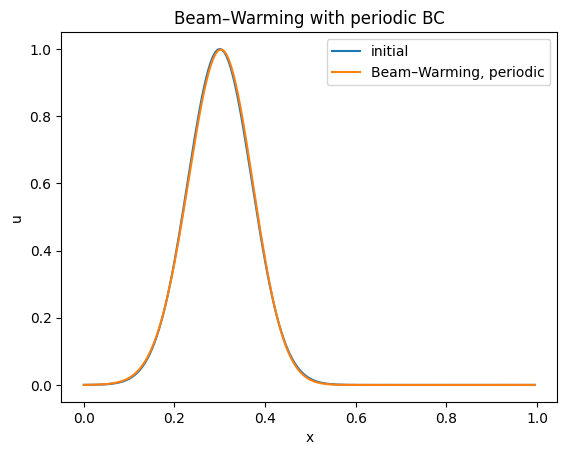

In [2]:
# Parameters
a   = 1.0          # advection speed
L   = 1.0          # domain length
Nx  = 200          # grid points
dx  = L / Nx
dt  = 0.4 * dx / abs(a)   # CFL < 1
x   = np.linspace(0, L, Nx, endpoint=False)

# Initial condition: smooth bump
u0 = np.exp(-100 * (x - 0.3)**2)

u = u0.copy()
t = 0.0
T_final = 1.0

while t < T_final - 1e-12:
    u = beam_warming_step(u, a, dx, dt, t, bc_type="periodic")
    t += dt

plt.plot(x, u0, label="initial")
plt.plot(x, u, label="Beam–Warming, periodic")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.title("Beam–Warming with periodic BC")
plt.show()


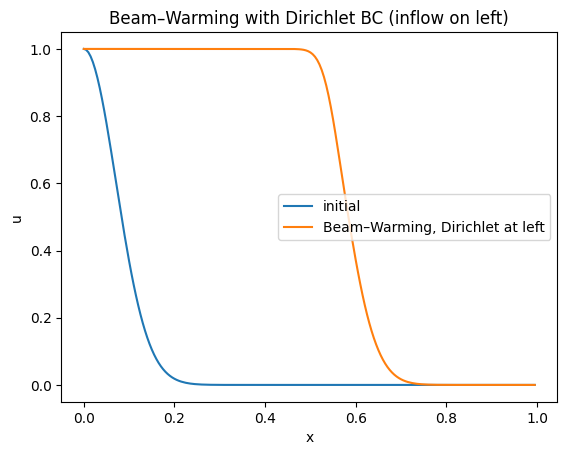

In [3]:
# Parameters
a   = 1.0          # advection speed
L   = 1.0          # domain length
Nx  = 200          # grid points
dx  = L / Nx
dt  = 0.4 * dx / abs(a)   # CFL < 1
x   = np.linspace(0, L, Nx, endpoint=False)

# Initial condition: smooth bump
u0 = np.exp(-100 * (x)**2)

def gL_dirichlet(t):
    return 1.0   # constant inflow

# No condition needed at right for a>0 outflow,
# but we could also specify gR(t) if we want.

u = u0.copy()
t = 0.0
T_final = 0.5

while t < T_final - 1e-12:
    u = beam_warming_step(u, a, dx, dt, t, 
                          bc_type="dirichlet", 
                          gL=gL_dirichlet, gR=None)
    t += dt

plt.plot(x, u0, label="initial")
plt.plot(x, u, label="Beam–Warming, Dirichlet at left")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.title("Beam–Warming with Dirichlet BC (inflow on left)")
plt.show()


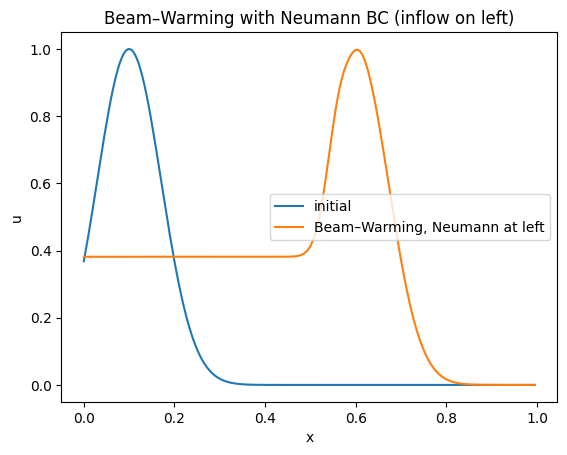

In [4]:
# Parameters
a   = 1.0          # advection speed
L   = 1.0          # domain length
Nx  = 200          # grid points
dx  = L / Nx
dt  = 0.4 * dx / abs(a)   # CFL < 1
x   = np.linspace(0, L, Nx, endpoint=False)

# Initial condition: smooth bump
u0 = np.exp(-100 * (x - 0.1)**2)

def qL_neumann(t):
    return 0.0   # homogeneous Neumann

u = u0.copy()
t = 0.0
T_final = 0.5

while t < T_final - 1e-12:
    u = beam_warming_step(u, a, dx, dt, t, 
                          bc_type="neumann", 
                          qL=qL_neumann, qR=None)
    t += dt

plt.plot(x, u0, label="initial")
plt.plot(x, u, label="Beam–Warming, Neumann at left")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.title("Beam–Warming with Neumann BC (inflow on left)")
plt.show()
